In [2]:
import pandas as pd
import numpy as np
import datetime

#### Load Dataset From CSV

In [8]:
df = pd.read_csv("F:/PYTHON/world-health-organization-who-situation-reports.csv")

In [9]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN
...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0
2863,2020-03-14,World,9761.0,433.0,142534,5392.0
2864,2020-03-15,World,10967.0,343.0,153517,5735.0
2865,2020-03-16,World,13971.0,855.0,167506,6606.0


In [11]:
df.dtypes

date             object
location         object
new_cases       float64
new_deaths      float64
total_cases       int64
total_deaths    float64
dtype: object

Terlihat bahwa kondisi data date masih dalam bentuk object, nah disini kita harus merubah bentuk dari date menjadi datetime

In [12]:
df["date"] = df['date'].apply(lambda x: np.datetime64(x))

In [14]:
df.dtypes

date            datetime64[ns]
location                object
new_cases              float64
new_deaths             float64
total_cases              int64
total_deaths           float64
dtype: object

Kemudian kita lakukan transformasi data tanggal menjadi Periode Bulan 

In [16]:
df["month"] = df['date'].apply(lambda x: x.to_period('M'))

In [17]:
df

,date,location,new_cases,new_deaths,total_cases,total_deaths,month
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN,2020-02
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN,2020-02
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN,2020-02
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN,2020-02
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN,2020-02
...,...,...,...,...,...,...,...
2862,2020-03-13,World,7488.0,338.0,132758,4956.0,2020-03
2863,2020-03-14,World,9761.0,433.0,142534,5392.0,2020-03
2864,2020-03-15,World,10967.0,343.0,153517,5735.0,2020-03
2865,2020-03-16,World,13971.0,855.0,167506,6606.0,2020-03


Kita akan mencari total kasus baru, kematian baru dan total kematian berdasarkan periode bulan. Pada kondisi ini kita gunakan fungsi PIVOT.

Dijumlahkan berdasarkan bulan berarti yang perlu di indexkan yakni month
dan agregasi nya menggunakan fungsi aggfunc=sum 

Jangan lupa untuk nama-nama tempat di dunia dihilangkan dulu dengan fungsi where 



In [20]:
pv= pd.pivot_table(df[df['location']!= 'world'], index='month', values=['new_cases','new_deaths', 'total_cases', 'total_deaths'], aggfunc=sum)

In [21]:
pv

,new_cases,new_deaths,total_cases,total_deaths
month,,,,
2020-01,19034.0,414.0,72914,1704.0
2020-02,151012.0,5402.0,3139412,90190.0
2020-03,187082.0,8906.0,4006728,145802.0


### Visualisasi 

Kita gunakan grafik batang untuk memvisualisasikan hasil. Visualisasi bisa gunakan fungsi ploting pada pandas 

<AxesSubplot:xlabel='month'>

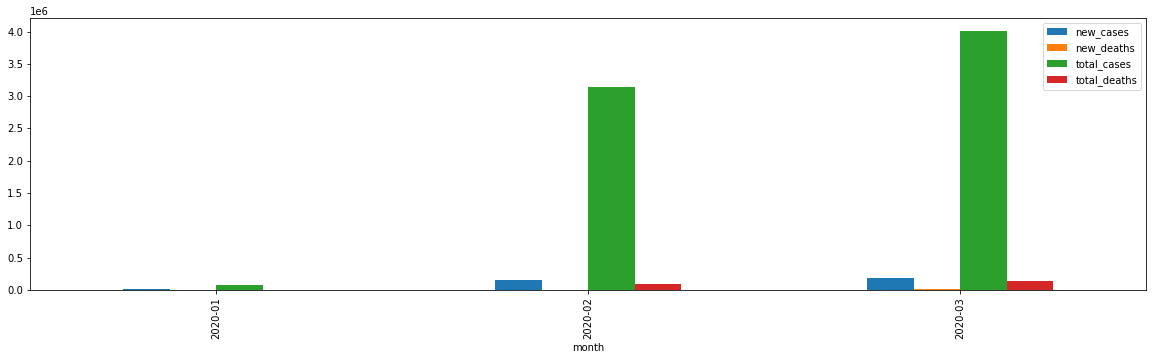

In [23]:
pv.plot(kind="bar", figsize=[20,5])